X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

dados = pd.read_excel('ENB2012_data.xlsx')


Saving ENB2012_data.xlsx to ENB2012_data (1).xlsx


0      16
1      16
2      16
3      16
4      21
       ..
763    18
764    17
765    16
766    16
767    17
Name: Y1, Length: 768, dtype: int64

In [ ]:
dados['Y1'] = dados['Y1'].apply(round)
dados['Y2'] = dados['Y2'].apply(round)


In [ ]:
dados['Y1'].unique()
x1 = dados['X1'].describe()
x1['mean']

resultsX1 = {}

for var in sorted(dados['Y1'].unique()):
  datafilter = dados[dados.Y1 == var]
  descX1 = datafilter.X1.describe()
  resultsX1[var] = [descX1]

print(resultsX1)




In [ ]:
resultsX2 = {}

for var in sorted(dados['Y1'].unique()):
  datafilter = dados[dados.Y1 == var]
  descX2 = datafilter.X2.describe()
  resultsX2[var] = [descX2]

print(resultsX2)

In [ ]:
#1.2
from sklearn.cluster import KMeans 

max_label = dados.Y1.value_counts().keys()[0] # classe com mais dados
kmeans = KMeans(1)
dados_filt = dados.loc[dados.Y1 == max_label,['X1', 'X2']]
kmeans.fit(dados_filt)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_ #centroide

array([[6.63108108e-01, 7.60162162e+02]])

In [ ]:
import numpy as np

np.cov(dados.loc[dados.Y1 == max_label,['X1', 'X2']]) # matriz de covariância

array([[306826.4448, 306826.4448, 306826.4448, ..., 297222.4512,
        297222.4512, 297222.4512],
       [306826.4448, 306826.4448, 306826.4448, ..., 297222.4512,
        297222.4512, 297222.4512],
       [306826.4448, 306826.4448, 306826.4448, ..., 297222.4512,
        297222.4512, 297222.4512],
       ...,
       [297222.4512, 297222.4512, 297222.4512, ..., 287919.0728,
        287919.0728, 287919.0728],
       [297222.4512, 297222.4512, 297222.4512, ..., 287919.0728,
        287919.0728, 287919.0728],
       [297222.4512, 297222.4512, 297222.4512, ..., 287919.0728,
        287919.0728, 287919.0728]])

Text(0, 0.5, 'X2 - Surface Area')

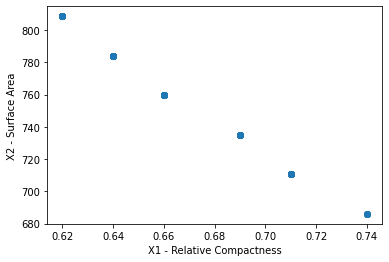

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns

plt.scatter(dados_filt.X1, dados_filt.X2)
#sns.lineplot(dados_filt.X1, dados_filt.X2)
plt.xlabel('X1 - Relative Compactness')
plt.ylabel('X2 - Surface Area') 

#1.4: Possui relação forte, mas negativa.

In [ ]:
#1.5 
dados_filt.corr() # matriz de correlação.

#1.6
import statsmodels.api as sm # usando o método dos mínimos quadrados (ordinary least squares).
X = sm.add_constant(dados_filt.X1)
Y = dados_filt.X2
model = sm.OLS(Y,X) 
results = model.fit()

results.params





const    1443.063286
X1      -1029.848852
dtype: float64

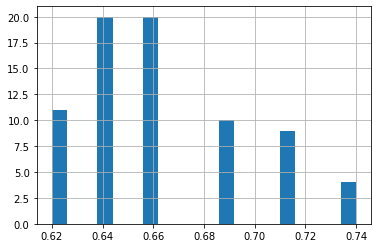

In [ ]:
#1.7
dados_filt.X1.hist(bins=20) # Variável muito discretizada(se concentra em valores fixos, não tende a ser contínua) e não se aproxima de uma gaussiana. Não possui outliers.


(array([11.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0., 20.,  0.,  0.,  0.,
         0., 10.,  0.,  0.,  9.,  0.,  4.]),
 array([-1.56458801, -1.39380977, -1.22303153, -1.0522533 , -0.88147506,
        -0.71069682, -0.53991859, -0.36914035, -0.19836211, -0.02758388,
         0.14319436,  0.3139726 ,  0.48475083,  0.65552907,  0.82630731,
         0.99708554,  1.16786378,  1.33864202,  1.50942025,  1.68019849,
         1.85097673]),
 <a list of 20 Patch objects>)

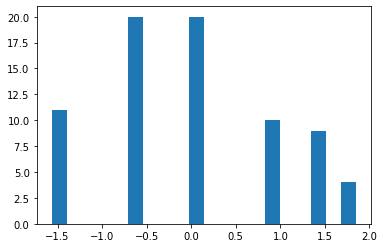

In [ ]:
from scipy.stats import boxcox
#1.8 
X1_boxcox = boxcox(dados_filt.X1)[0]
X1_boxcox = (X1_boxcox - X1_boxcox.mean()) / X1_boxcox.std()
plt.hist(X1_boxcox, bins= 20)

# Pelo caráter discreto da variável e por não conter outliers, a aplicação do método boxcox não alterou de forma significativa a distribuição da variável.